Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [162]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# imports necessary to create a declarative entity model using sqlalchemy 2.0
import sqlalchemy as sqla
from sqlalchemy.orm import DeclarativeBase
from sqlalchemy.orm import MappedAsDataclass
from sqlalchemy.orm import Mapped
from sqlalchemy.orm import mapped_column
from sqlalchemy import ForeignKey
from typing import Optional

In [6]:
city_bikes_df = pd.read_csv('city_bikes_data')
city_bikes_df.head()

,id,name,free_bikes,latitude,longitude
0,f5462555877f4cb1317baf6041527a93,virtuell - Kurfürstendamm/Rankestraße,9,52.504157,13.335328
1,c32093893e4e32afee18894c7c0c1ba4,virtuell - EDEKA Schmitt (S Halensee),0,52.496986,13.291210
2,362ba47350cab100fe1d81be3cb7a058,Joachim-Friedrich-Str./KuDamm,1,52.498323,13.296157
3,07b6329ced662a2009a9132eef6ac711,Albrecht-Achilles-Straße,2,52.499137,13.303743
4,dac275f8454a83bf3e1e7ad1a4fb7e99,Karlsruher Str./Aspria,4,52.500614,13.294401


In [9]:
poi_fs_df = pd.read_csv('fs_data.csv')
poi_fs_df.head()

,poi_reference_station_id,poi_id,poi_name,poi_distance,poi_source,poi_rating,poi_price_level,poi_total_reviews,poi_location,poi_primary_category,poi_sub_category
0,0001cd599fc5f3ae6cfa5474779cd94f,4b6dcb34f964a52076902ce3,Curry Baude,115,foursquare,85.0,1.0,38.0,"Badstr. 1-5, 13357 Berlin",Restaurant,Fast Food Restaurant
1,0001cd599fc5f3ae6cfa5474779cd94f,4b8d0776f964a520f1e432e3,La Femme,251,foursquare,86.0,2.0,14.0,"Badstr. 67 (Hochstr.), 13357 Berlin",Restaurant,Restaurant
2,0001cd599fc5f3ae6cfa5474779cd94f,4beb27466295c9b6ce5c8708,Offside,566,foursquare,90.0,2.0,23.0,"Jülicher Str. 4, 13357 Berlin",Bar,Sports Bar
3,0001cd599fc5f3ae6cfa5474779cd94f,4b705ad5f964a520d6142de3,Shalimar Restaurant,406,foursquare,81.0,2.0,24.0,"Bellermannstr. 17a, 13357 Berlin",Restaurant,Indian Restaurant
4,0001cd599fc5f3ae6cfa5474779cd94f,4e72d880196b52816e04af8b,Studio8,380,foursquare,79.0,1.0,11.0,"Grüntaler Str. 8, 13357 Berlin",Bar,Bar


In [10]:
poi_yelp_df = pd.read_csv('yelp_data.csv')
poi_yelp_df.head()

,poi_reference_station_id,poi_id,poi_name,poi_distance,poi_source,poi_rating,poi_price_level,poi_total_reviews,poi_location,poi_primary_category,poi_sub_category
0,0001cd599fc5f3ae6cfa5474779cd94f,p11gyzRUK0o9SqV25qX8YQ,Curry Baude,102.145973,yelp,90,1.0,108,Badstr. 1 - 5,Restaurant,currysausage
1,0001cd599fc5f3ae6cfa5474779cd94f,XvwwWZojW5lExwdtujz-7w,Pizza Pasta Tralala,109.747869,yelp,80,1.0,29,Badstr. 4,Restaurant,pizza
2,0001cd599fc5f3ae6cfa5474779cd94f,A4YUIQQEBkXCMJ38JovZ3w,Lichtburg,182.872133,yelp,80,2.0,40,Behmstr. 9,Restaurant,german
3,0001cd599fc5f3ae6cfa5474779cd94f,ZEUm1htbgBHyjR0E0YjlBg,Shalimar,408.614625,yelp,90,2.0,68,Bellermannstr. 17 A,Restaurant,pakistani
4,0001cd599fc5f3ae6cfa5474779cd94f,C49HN1YVvsNa3WnoU3uITQ,Cocos,123.776481,yelp,80,2.0,18,Badstr. 4,Restaurant,sushi


In [11]:
# drop duplicates in the poi data. Duplicates result since the adjacent radius
# from multiple bike stations may overlap
unique_poi_fs_df = poi_fs_df.drop_duplicates(subset='poi_name', keep ='first')
unique_poi_yelp_df = poi_yelp_df.drop_duplicates(subset='poi_name', keep = 'first')


In [17]:
# concatenate poi data from Foursquare and Yelp
combined_poi_data = pd.concat([unique_poi_fs_df,unique_poi_yelp_df],axis=0)
combined_poi_data.head()

,poi_reference_station_id,poi_id,poi_name,poi_distance,poi_source,poi_rating,poi_price_level,poi_total_reviews,poi_location,poi_primary_category,poi_sub_category
0,0001cd599fc5f3ae6cfa5474779cd94f,4b6dcb34f964a52076902ce3,Curry Baude,115.0,foursquare,85.0,1.0,38.0,"Badstr. 1-5, 13357 Berlin",Restaurant,Fast Food Restaurant
1,0001cd599fc5f3ae6cfa5474779cd94f,4b8d0776f964a520f1e432e3,La Femme,251.0,foursquare,86.0,2.0,14.0,"Badstr. 67 (Hochstr.), 13357 Berlin",Restaurant,Restaurant
2,0001cd599fc5f3ae6cfa5474779cd94f,4beb27466295c9b6ce5c8708,Offside,566.0,foursquare,90.0,2.0,23.0,"Jülicher Str. 4, 13357 Berlin",Bar,Sports Bar
3,0001cd599fc5f3ae6cfa5474779cd94f,4b705ad5f964a520d6142de3,Shalimar Restaurant,406.0,foursquare,81.0,2.0,24.0,"Bellermannstr. 17a, 13357 Berlin",Restaurant,Indian Restaurant
4,0001cd599fc5f3ae6cfa5474779cd94f,4e72d880196b52816e04af8b,Studio8,380.0,foursquare,79.0,1.0,11.0,"Grüntaler Str. 8, 13357 Berlin",Bar,Bar


In [18]:
# join the poi data with the city bikes data on the uniques station id
joined_data_df = city_bikes_df.merge(combined_poi_data, left_on='id',right_on='poi_reference_station_id')

In [27]:
joined_data_df.shape

(3722, 15)

In [21]:
joined_data_df.shape

(3722, 16)

In [23]:
joined_data_df.drop(['poi_reference_station_id'],axis='columns',inplace=True)

In [25]:
joined_data_df.shape
joined_data_df.sort_values(by='id',inplace=True)

In [30]:
joined_data_df.head(2)

,id,name,free_bikes,latitude,longitude,poi_id,poi_name,poi_distance,poi_source,poi_rating,poi_price_level,poi_total_reviews,poi_location,poi_primary_category,poi_sub_category
3496,0001cd599fc5f3ae6cfa5474779cd94f,S+U Bhf. Gesundbrunnen / Brunnenstraße,8,52.548684,13.388198,H1rViFTurA7V0myOyPimVA,Curry & Chili,861.475499,yelp,90.0,1.0,53.0,Osloer Str. 109,Restaurant,currysausage
3494,0001cd599fc5f3ae6cfa5474779cd94f,S+U Bhf. Gesundbrunnen / Brunnenstraße,8,52.548684,13.388198,ayEp4oqMnCPcQF2LSznmCQ,grain de malice,102.327854,yelp,90.0,1.0,3.0,Badstr. 4,Fashion Retail,fashion


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [31]:
joined_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3722 entries, 3496 to 2411
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3722 non-null   object 
 1   name                  3722 non-null   object 
 2   free_bikes            3722 non-null   int64  
 3   latitude              3722 non-null   float64
 4   longitude             3722 non-null   float64
 5   poi_id                3722 non-null   object 
 6   poi_name              3722 non-null   object 
 7   poi_distance          3722 non-null   float64
 8   poi_source            3722 non-null   object 
 9   poi_rating            3365 non-null   float64
 10  poi_price_level       3114 non-null   float64
 11  poi_total_reviews     3356 non-null   float64
 12  poi_location          3720 non-null   object 
 13  poi_primary_category  3722 non-null   object 
 14  poi_sub_category      3722 non-null   object 
dtypes: float64(6), int64(1)

In [ ]:
'''
While identifying columns are important in other contexts, they are not needed for EDA
and model_building. Therefore, columns 'id','name','poi_id','poi_name',and POIs formmated address
will be removed.


'''

In [51]:
desired_columns = joined_data_df.columns[~joined_data_df.columns.isin(['id','name','poi_id','poi_name','poi_location'])]

In [52]:
EDA_df = joined_data_df[desired_columns]

In [53]:
EDA_df.head(2)

,free_bikes,latitude,longitude,poi_distance,poi_source,poi_rating,poi_price_level,poi_total_reviews,poi_primary_category,poi_sub_category
3496,8,52.548684,13.388198,861.475499,yelp,90.0,1.0,53.0,Restaurant,currysausage
3494,8,52.548684,13.388198,102.327854,yelp,90.0,1.0,3.0,Fashion Retail,fashion


In [ ]:
'''
The rating for each POI is going to be critical for further assessments. Hence, we want
to focus our exploration on those POI's that have enough data such that the location
services were able to generate a rating for them. Consequently, we will drop those POI's
without ratings.
'''

In [58]:
EDA_df = EDA_df.dropna(subset='poi_rating')

In [59]:
EDA_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3365 entries, 3496 to 2411
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   free_bikes            3365 non-null   int64  
 1   latitude              3365 non-null   float64
 2   longitude             3365 non-null   float64
 3   poi_distance          3365 non-null   float64
 4   poi_source            3365 non-null   object 
 5   poi_rating            3365 non-null   float64
 6   poi_price_level       2938 non-null   float64
 7   poi_total_reviews     3356 non-null   float64
 8   poi_primary_category  3365 non-null   object 
 9   poi_sub_category      3365 non-null   object 
dtypes: float64(6), int64(1), object(3)
memory usage: 289.2+ KB


In [60]:
EDA_df['poi_price_level'].value_counts()

poi_price_level
2.0    1626
1.0    1017
3.0     266
4.0      29
Name: count, dtype: int64

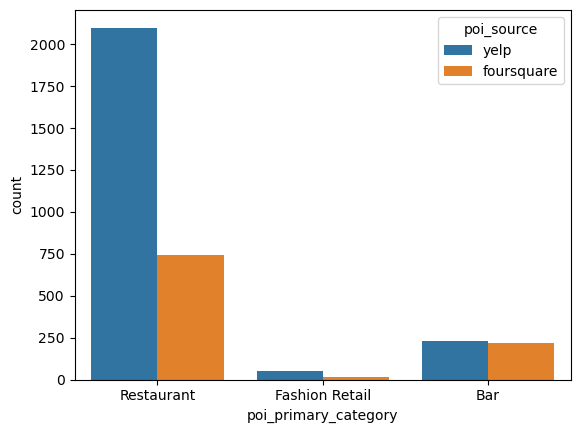

In [87]:
sns.countplot(data=EDA_df,x='poi_primary_category',hue='poi_source')
# Rotate x-labels for better visibility
#plt.xticks(rotation=90, ha='right')
plt.show()

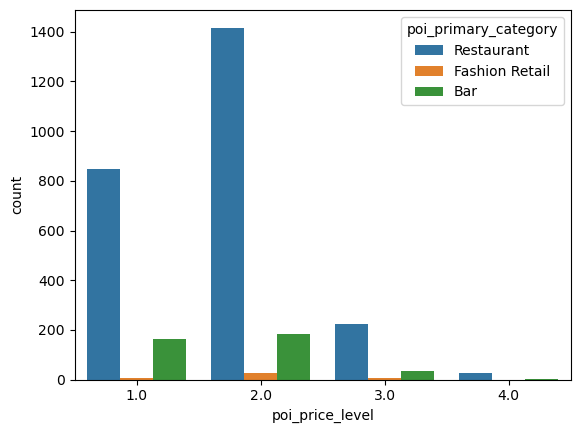

In [88]:
sns.countplot(data=EDA_df,hue='poi_primary_category',x='poi_price_level')
# Rotate x-labels for better visibility
#plt.xticks(rotation=90, ha='right')
plt.show()

In [62]:
missing_price_level = EDA_df[EDA_df['poi_price_level'].isna()]

In [70]:
missing_price_level.shape

(427, 10)

In [72]:
sum(missing_price_level['poi_total_reviews'].isna())

4

In [ ]:
'''
The aim of these sets of analyses is to determine how to handle null values in the 
poi_price_level_column. From the countplot below, we can glean that the majority of the
missing values are from POIs that are restaurants and whose data were collected from Yelp.
'''

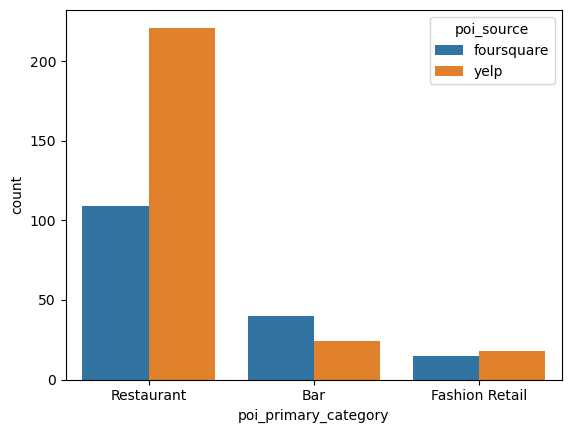

In [89]:
sns.countplot(data=missing_price_level,x='poi_primary_category',hue='poi_source')
plt.show()

In [91]:
'''
From the foregoing, we can glean the following.
1. The price level data is right-skewed and using the median as the measure of central tendency
will be appropriate
2. Although the missing values for the price level are relatively small (~12% of the total),
dropping them will result in loss of a significant amount of data from the Bar and Fashion Retail
categories, since most data is dominated from the Restaurant category. Hence, the decision
to replace missing values with representative values has been made.
3. It can be inferred that the price level values are related by group, such as the categories and
the source of data. Hence, representative values will be computed based on this grouping.
4. Specifically, the missing price level in each row will be determined by the median 
of the category and from the source it was obtained.,
source --> category | median
'''

'\nFrom the foregoing, we can glean the following.\n'

In [93]:
EDA_df.groupby(['poi_source','poi_primary_category'])['poi_price_level'].median()

poi_source  poi_primary_category
foursquare  Bar                     1.0
            Fashion Retail          2.0
            Restaurant              2.0
yelp        Bar                     2.0
            Fashion Retail          2.0
            Restaurant              2.0
Name: poi_price_level, dtype: float64

In [114]:
group_median=EDA_df.groupby(['poi_source','poi_primary_category'])['poi_price_level'].transform('median')

In [116]:
EDA_df['poi_price_level'].fillna(group_median, inplace=True)

In [117]:
EDA_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3365 entries, 3496 to 2411
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   free_bikes            3365 non-null   int64  
 1   latitude              3365 non-null   float64
 2   longitude             3365 non-null   float64
 3   poi_distance          3365 non-null   float64
 4   poi_source            3365 non-null   object 
 5   poi_rating            3365 non-null   float64
 6   poi_price_level       3365 non-null   float64
 7   poi_total_reviews     3356 non-null   float64
 8   poi_primary_category  3365 non-null   object 
 9   poi_sub_category      3365 non-null   object 
dtypes: float64(6), int64(1), object(3)
memory usage: 289.2+ KB


In [122]:
# categories = ['Bar','Fashion Retail', 'Restaurant']
# sources = ['yelp','foursquare']
# for source in sources:
#     for category in categories:
#         print(group_median[(source,category)])

In [123]:
# # function to fill in missing values
# def fill_missing_values(row):
#     if np.isnan(row.poi_price_level):
#         row.poi_price_level = group_median[(row.poi_source,row.poi_primary_category)]
#     return row

In [120]:
#df_filled = EDA_df.apply(fill_missing_values,axis=1)

In [121]:
#df_filled.info()

In [125]:
# missing values for the total reviews column will dropped as they are a small proportion
# of the total dataset
EDA_df = EDA_df.dropna(subset='poi_total_reviews')

In [126]:
EDA_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3356 entries, 3496 to 2411
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   free_bikes            3356 non-null   int64  
 1   latitude              3356 non-null   float64
 2   longitude             3356 non-null   float64
 3   poi_distance          3356 non-null   float64
 4   poi_source            3356 non-null   object 
 5   poi_rating            3356 non-null   float64
 6   poi_price_level       3356 non-null   float64
 7   poi_total_reviews     3356 non-null   float64
 8   poi_primary_category  3356 non-null   object 
 9   poi_sub_category      3356 non-null   object 
dtypes: float64(6), int64(1), object(3)
memory usage: 288.4+ KB


#### EDA - Univariate Analysis:

In [127]:
EDA_df.describe()

,free_bikes,latitude,longitude,poi_distance,poi_rating,poi_price_level,poi_total_reviews
count,3356.000000,3356.000000,3356.000000,3356.000000,3356.000000,3356.000000,3356.000000
mean,1.439213,52.505074,13.396913,500.623885,80.861442,1.782777,40.993743
std,2.178926,0.035281,0.084850,328.535366,11.715894,0.616863,66.581337
min,0.000000,52.419876,13.160078,3.892482,20.000000,1.000000,0.000000
25%,0.000000,52.484394,13.335659,231.117776,78.000000,1.000000,7.000000
50%,1.000000,52.504952,13.396980,413.936154,80.000000,2.000000,19.000000
75%,2.000000,52.528333,13.442700,761.169325,90.000000,2.000000,50.000000
max,20.000000,52.631881,13.625027,1357.508883,100.000000,4.000000,1089.000000


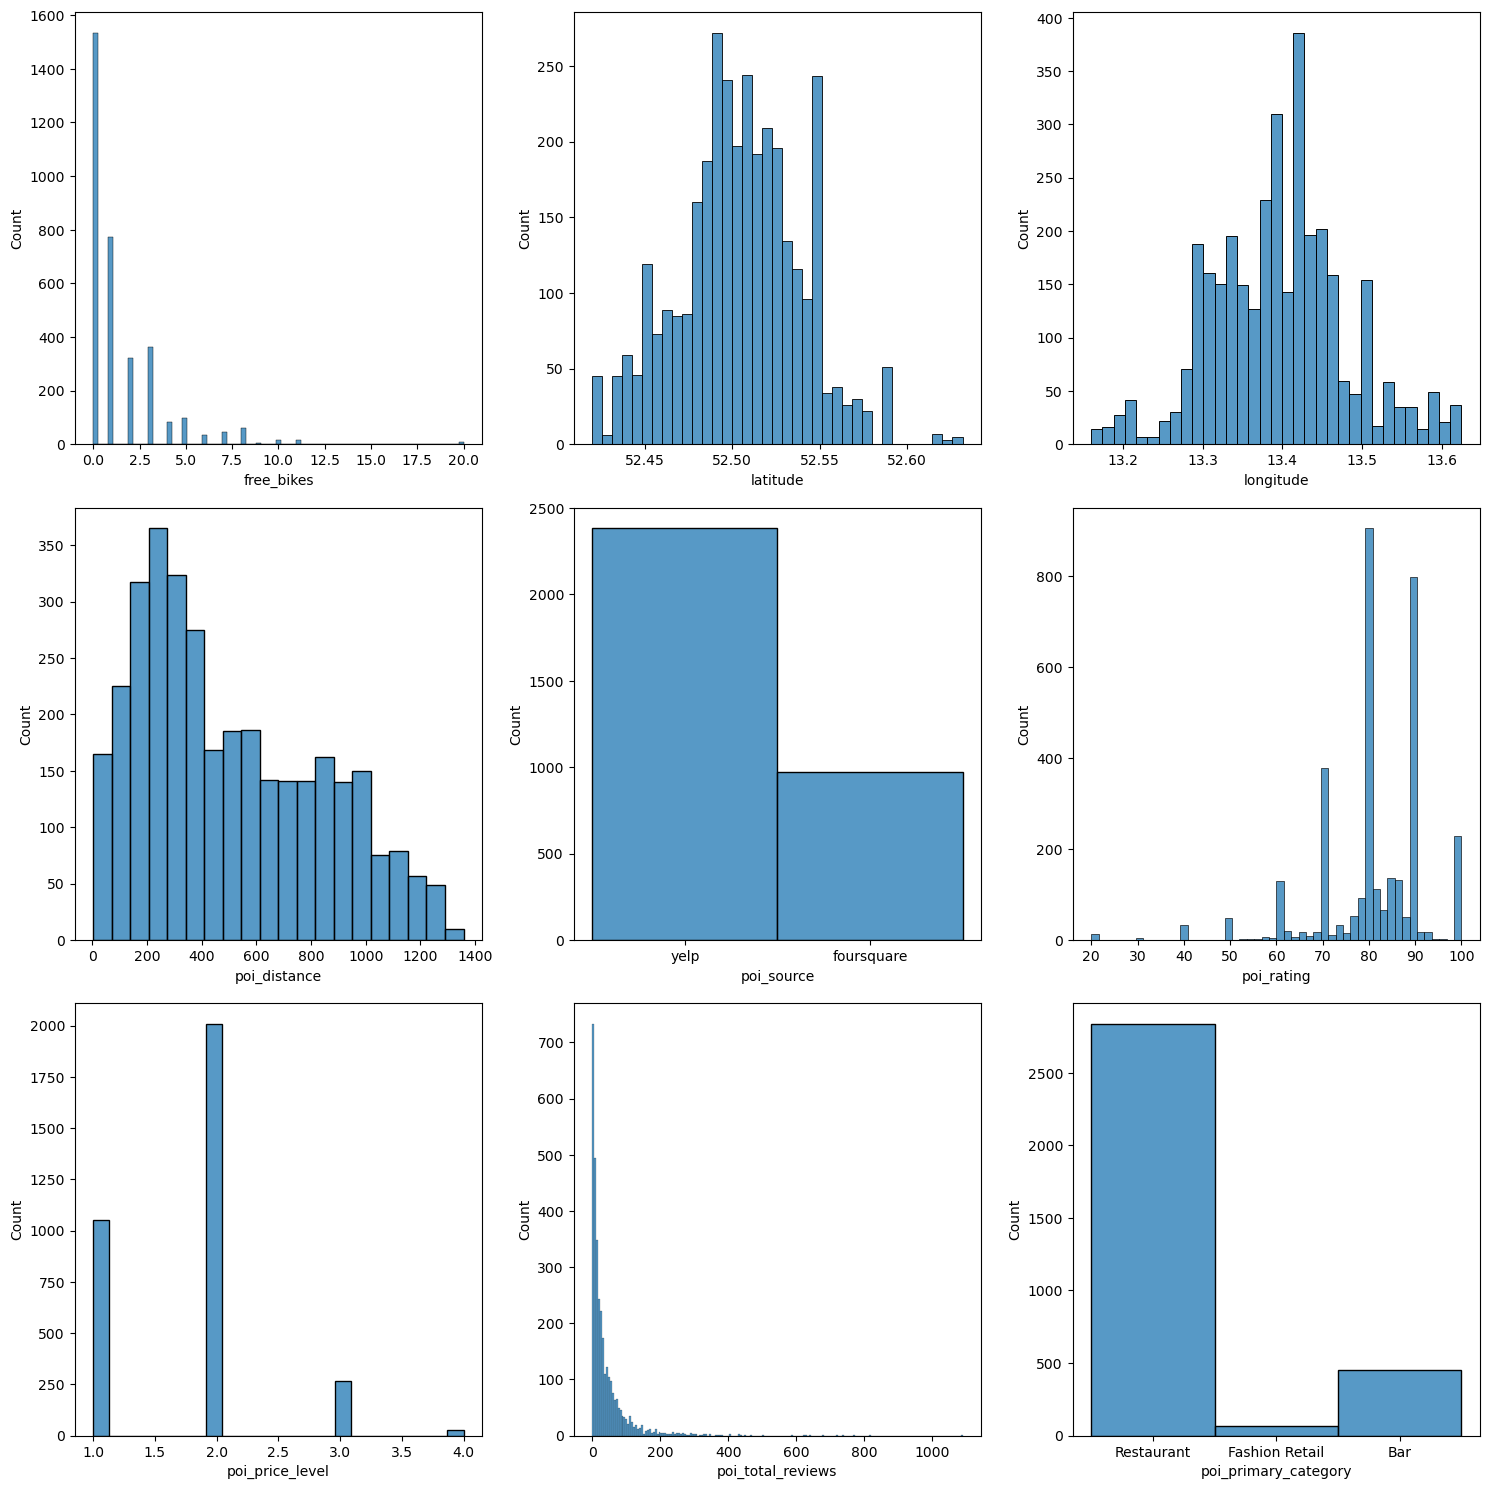

In [130]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for ax, column in zip(axs.ravel(), EDA_df.columns):
    sns.histplot(EDA_df[column], ax=ax)
    #ax.set_title(column)
    #ax.set_ylabel('')

plt.tight_layout()
plt.show()

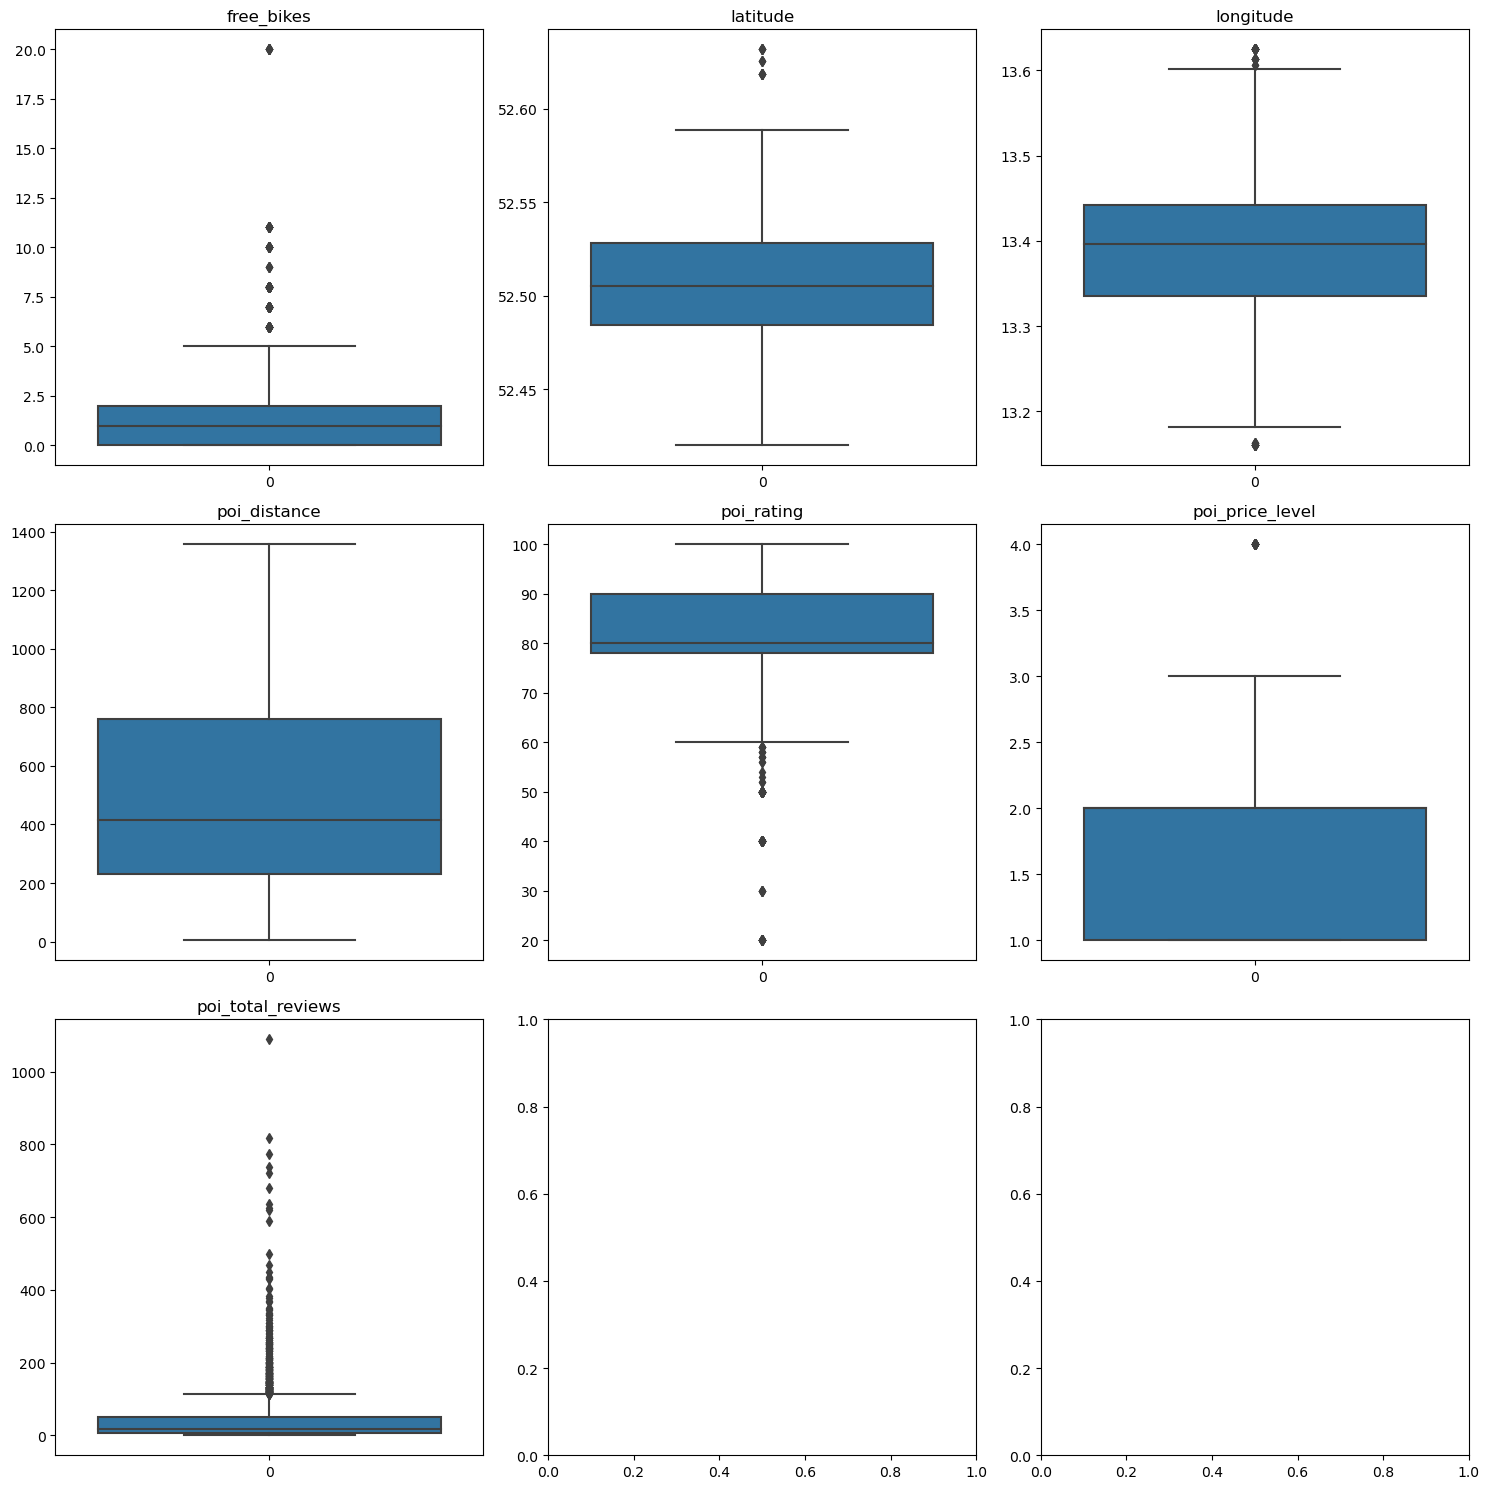

In [133]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for ax, column in zip(axs.ravel(), EDA_df.select_dtypes(include=['number']).columns):
    sns.boxplot(EDA_df[column], ax=ax)
    ax.set_title(column)
    #ax.set_ylabel('')

plt.tight_layout()
plt.show()

 Interesting observations
 1. Despite limiting POI search to within 1000m of the bike station, the distance attribute returned
 shows some POIs exceeding the cutoff. Set criteria should then be modified in the reporting to account
 for this
 2. Price level for POIs can be effectively interpreted as a categorical variable
 3. The POIs are significantly restaurants. It might not be meaningful, for example, to get more granularity into the fashion retail category, due to limited data.
 4. From the box plots, I can glean that, at a high level, the data might not be representative as many datasets are skewed towards some categories or levels. Furthermore, in combination with the histplot, we can conclude that the poi_rating might actually be more appropriately classified as categorical, whose modeling might be more appropriate for classification models.
 5. There are some genuine outliers like for poi_total_reviews and number of free_bikes. Depending on the ultimate modeling choice, it might be necessary to remove these if deciding on linear regression modeling.
 

#### EDA - Multivariate Analysis:

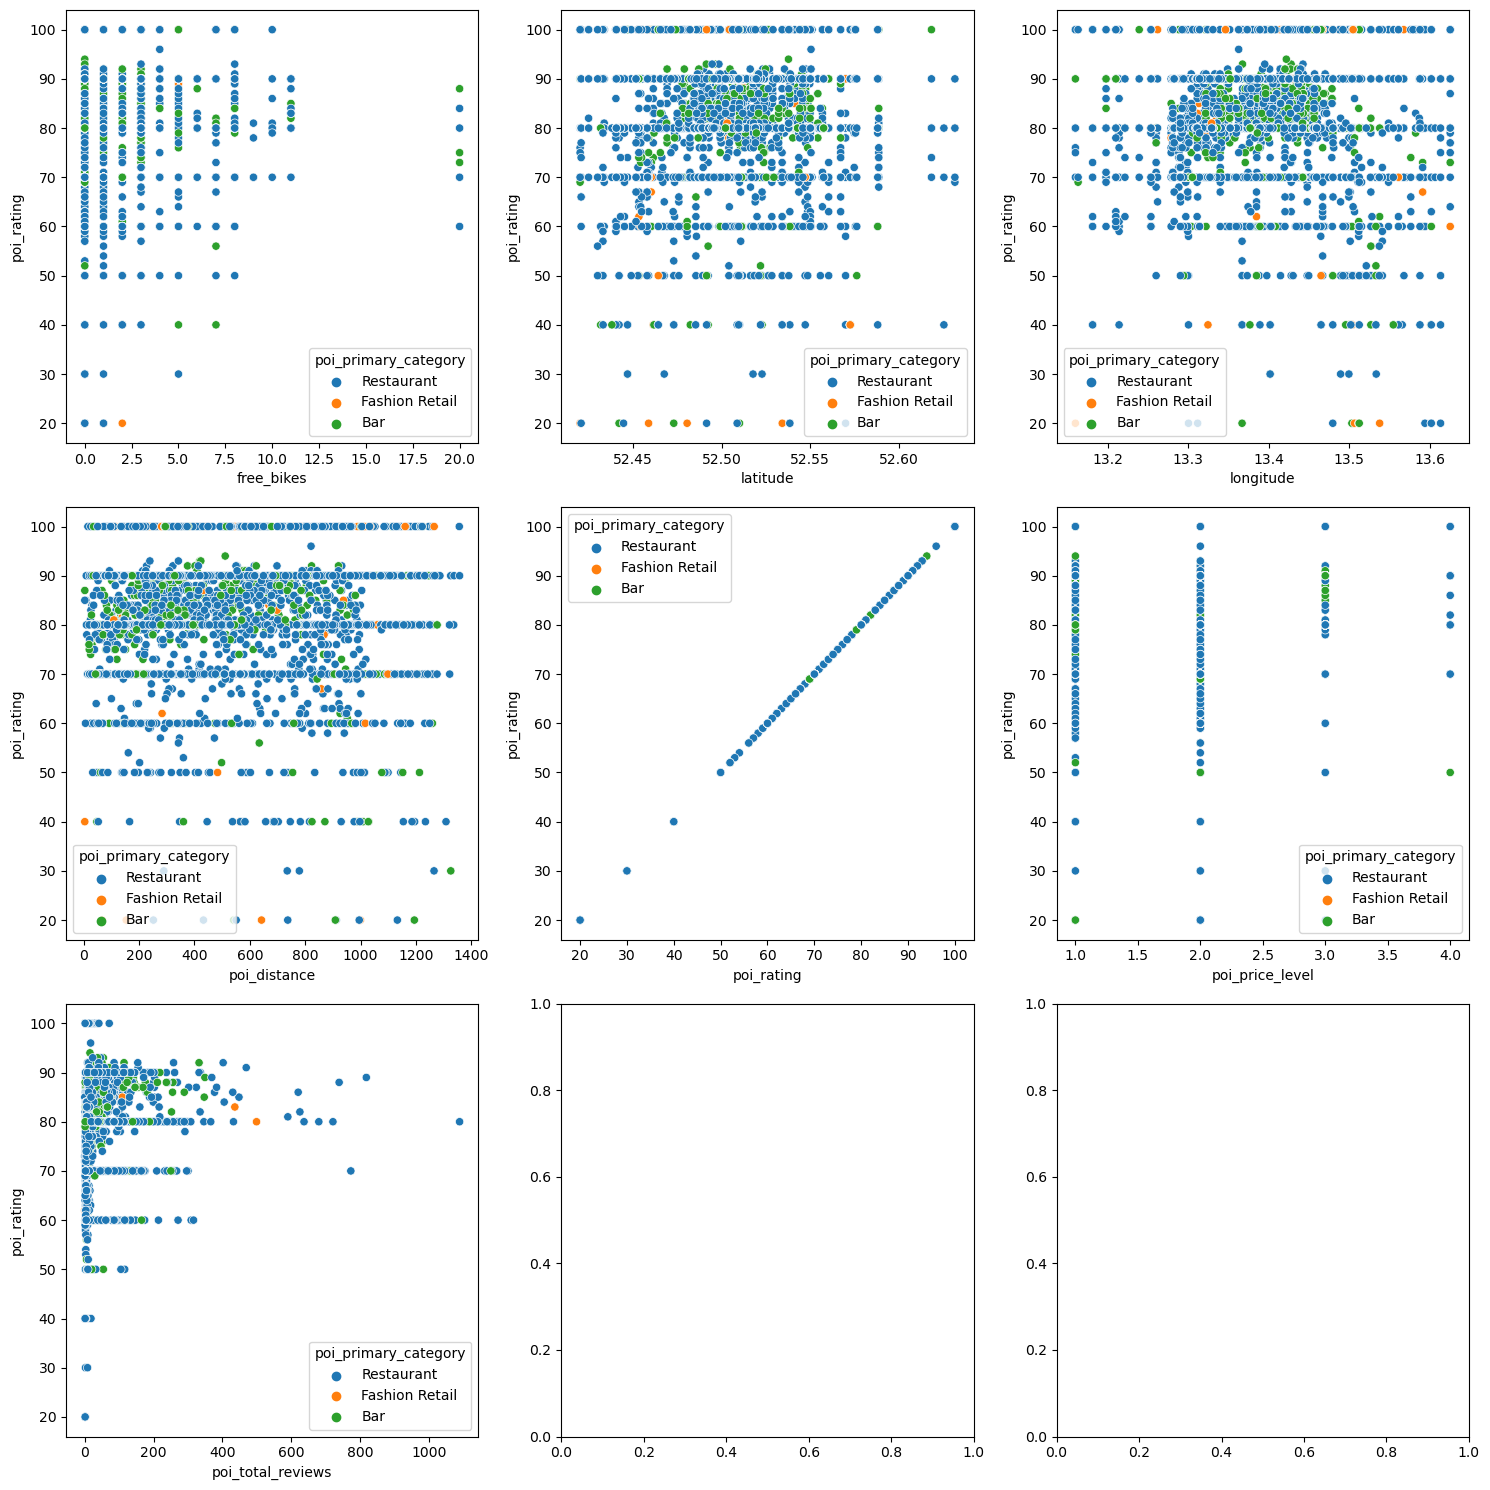

In [138]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for ax, column in zip(axs.ravel(), EDA_df.select_dtypes(include=['number']).columns):
    #sns.boxplot(EDA_df[column], ax=ax)
    sns.scatterplot(data=EDA_df, x=column, y="poi_rating", hue="poi_primary_category",ax=ax)
    #ax.set_title(column)
    #ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
numeric = EDA_df[EDA_df.select_dtypes(include=['number']).columns]

In [143]:
numeric.corr()

,free_bikes,latitude,longitude,poi_distance,poi_rating,poi_price_level,poi_total_reviews
free_bikes,1.000000,0.090377,0.035523,-0.114826,0.018065,0.031531,0.042700
latitude,0.090377,1.000000,-0.112482,0.014260,0.029916,-0.033789,0.084247
longitude,0.035523,-0.112482,1.000000,0.081163,-0.088983,-0.060907,-0.048789
poi_distance,-0.114826,0.014260,0.081163,1.000000,-0.008283,0.005387,-0.053251
poi_rating,0.018065,0.029916,-0.088983,-0.008283,1.000000,-0.050770,0.013923
poi_price_level,0.031531,-0.033789,-0.060907,0.005387,-0.050770,1.000000,0.127207
poi_total_reviews,0.042700,0.084247,-0.048789,-0.053251,0.013923,0.127207,1.000000


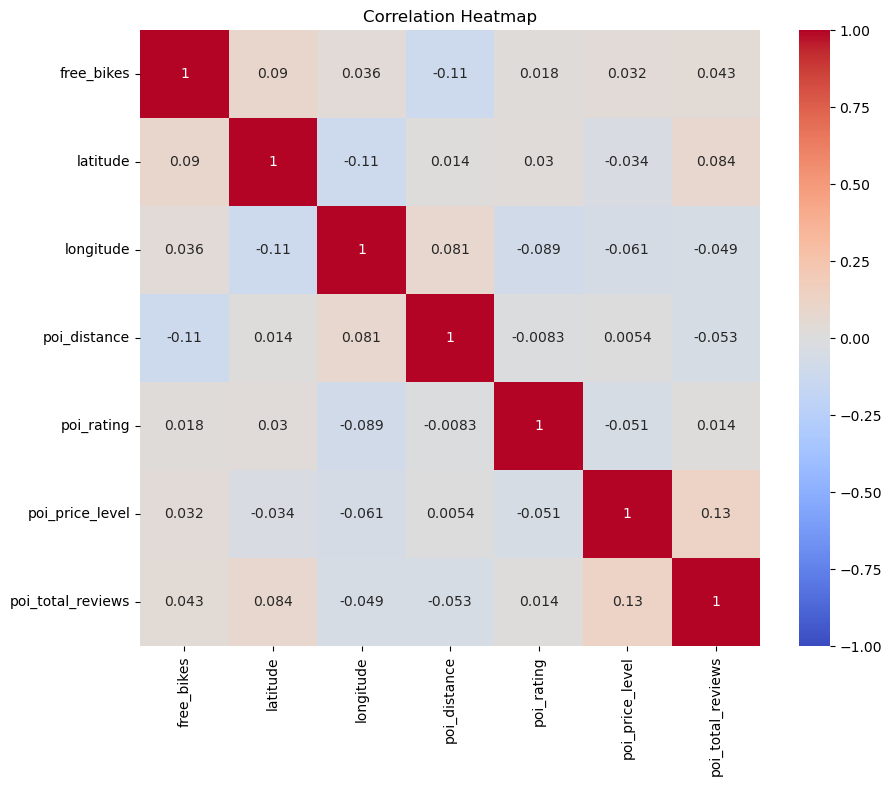

In [144]:
# Calculate correlation matrix
corr = numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

It is seeming more likely that this problem will be a multivariate classification problem, as there is no discernible linear (or otherwise) relationship between variables.

#### EDA - Trends and Patterns:

In [ ]:
# Does the rating  vary significantly based on the source?
''' No significant variation noted. They seem to be clustered around higher rating levels'''

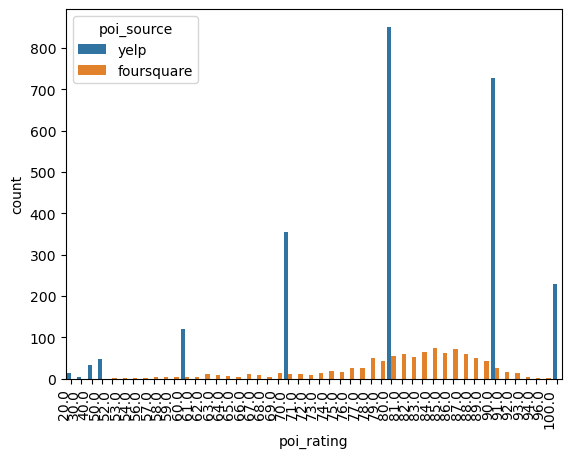

In [147]:
sns.countplot(data=EDA_df,hue='poi_source',x='poi_rating')
# Rotate x-labels for better visibility
plt.xticks(rotation=90, ha='right')
plt.show()

In [151]:
# Are certain POI categories rated consistently higher than others
'''The average ratings for all primary categories are similar '''

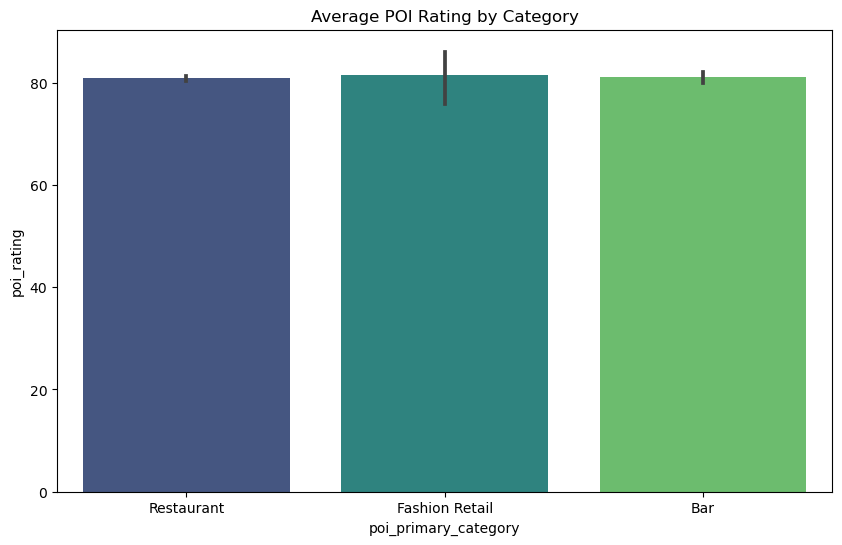

In [150]:
plt.figure(figsize=(10,6))
sns.barplot(x='poi_primary_category', y='poi_rating', data=EDA_df, palette='viridis')
plt.title('Average POI Rating by Category')
plt.show()

In [153]:
# Are pricier POIs rated higher or lower than more affordable ones?
'''On first glance, more expensive POIs seem to have higher average ratings. However due to the limited data
from that grouping, there is more margin of error in drawing that conclusion.'''

'On first glance, more expensive POIs seem to have higher average ratings. However due to the limited data\nfrom that grouping, there is more margin of error in drawing that conclusion.'

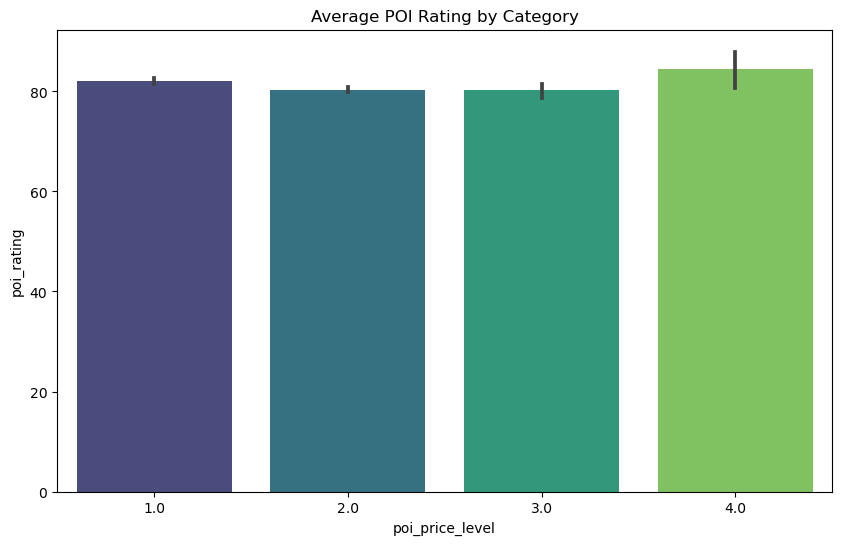

In [152]:
plt.figure(figsize=(10,6))
sns.barplot(x='poi_price_level', y='poi_rating', data=EDA_df, palette='viridis')
plt.title('Average POI Rating by Category')
plt.show()

In [140]:
numeric.shape

(3356, 7)

# Database

The database data model design in this section is guided by two main paradigms:
1. Each table (or entity) in the database should contain only attributes specific to a single theme
2. Every attribute in a single table must depend on the primary key(s) and nothing but the whole primary key(s).
Hence, three tables will be created.
1. bike_station_info --> |'station_id'|'station_name'|'latitude'|'longitude'|'free_bikes'|
2. bike_station_poi_info --> |'station_id'|'poi_id'|'distance_from_station'|
3. poi_info --> |'poi_id'|'poi_name'|'poi_source'|'poi_rating'|'poi_price_level'|'poi_total_reviews'|
                |'poi_formatted_address'|'poi_primary_category'|'poi_sub_category'|

In [ ]:
# Declarative ORM-like techniques will be used to model the tables in Python, which will then
# be pushed to an SQLite file. This is important especially if we intend to continue further developments
# of the model in Python. Hence, I believe the syntax overhead justified

In [160]:
city_bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3890 entries, 0 to 3889
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          3890 non-null   object 
 1   name        3890 non-null   object 
 2   free_bikes  3890 non-null   int64  
 3   latitude    3890 non-null   float64
 4   longitude   3890 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 152.1+ KB


In [156]:
combined_poi_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3722 entries, 0 to 5621
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   poi_reference_station_id  3722 non-null   object 
 1   poi_id                    3722 non-null   object 
 2   poi_name                  3722 non-null   object 
 3   poi_distance              3722 non-null   float64
 4   poi_source                3722 non-null   object 
 5   poi_rating                3365 non-null   float64
 6   poi_price_level           3114 non-null   float64
 7   poi_total_reviews         3356 non-null   float64
 8   poi_location              3720 non-null   object 
 9   poi_primary_category      3722 non-null   object 
 10  poi_sub_category          3722 non-null   object 
dtypes: float64(4), object(7)
memory usage: 348.9+ KB


In [205]:
# create and connect to a local SQLite database
engine = sqla.create_engine("sqlite:///../data/bike_data.db")

In [163]:
# create the base class for table models
class Base(DeclarativeBase, MappedAsDataclass):
    pass

In [164]:
# build bike_station_info table model
class BikeStationInfo(Base):
    __tablename__ = 'bike_station_info'
    station_id: Mapped[str] = mapped_column(primary_key=True)
    station_name: Mapped[Optional[str]]
    free_bikes: Mapped[Optional[int]]
    latitude: Mapped[float]
    longitude: Mapped[float]

In [165]:
# build bike_station_poi_info table model
class BikeStationPoiInfo(Base):
    __tablename__ = 'bike_station_poi_info'
    station_id: Mapped[str] = mapped_column(ForeignKey('bike_station_info.station_id'),primary_key=True)
    poi_id: Mapped[str] = mapped_column(ForeignKey('poi_info.poi_id'),primary_key = True)
    distance_from_station: Mapped[Optional[float]]

In [170]:
# build poi_info table model
class PoiInfo(Base):
    __tablename__ = 'poi_info'
    poi_id: Mapped[str] = mapped_column(primary_key=True)
    station_id: Mapped[str] = mapped_column(ForeignKey('bike_station_info.station_id'))
    poi_name: Mapped[Optional[str]]
    poi_source: Mapped[Optional[str]]
    poi_rating: Mapped[Optional[float]]
    poi_price_level: Mapped[Optional[float]]
    poi_total_reviews: Mapped[Optional[float]]
    poi_formatted_address: Mapped[Optional[str]]
    poi_primary_category: Mapped[Optional[str]]
    poi_sub_category: Mapped[Optional[str]]

In [166]:
insert_stmt_bike_station_info = sqla.insert(BikeStationInfo)

In [168]:
print(insert_stmt_bike_station_info)

INSERT INTO bike_station_info (station_id, station_name, free_bikes, latitude, longitude) VALUES (:station_id, :station_name, :free_bikes, :latitude, :longitude)


The built up insert statement is very convenient as it sets up placeholders to enable batch insertion
into the database using a list of dictionaries.

In [171]:
# define the other insert_stmts_similarly
insert_stmt_bike_station_poi_info = sqla.insert(BikeStationPoiInfo)
insert_stmt_poi_info = sqla.insert(PoiInfo)

In [175]:
# now, we need to build the data values that will be inserted into each table
city_bikes_df.rename(columns={'id':'station_id','name':'station_name'},inplace=True)

In [176]:
city_bikes_df.head(1)

,station_id,station_name,free_bikes,latitude,longitude
0,f5462555877f4cb1317baf6041527a93,virtuell - Kurfürstendamm/Rankestraße,9,52.504157,13.335328


In [179]:
bike_station_info_values = city_bikes_df.to_dict(orient='records')

In [181]:
bike_station_info_values[0]

{'station_id': 'f5462555877f4cb1317baf6041527a93',
 'station_name': 'virtuell - Kurfürstendamm/Rankestraße',
 'free_bikes': 9,
 'latitude': 52.504157,
 'longitude': 13.335328}

In [183]:
combined_poi_data.rename(columns={'poi_reference_station_id':'station_id','poi_location':'poi_formatted_address'},inplace=True)

In [192]:
temp_combined_poi_data = combined_poi_data[combined_poi_data.columns[~combined_poi_data.columns.isin(['poi_distance'])]]

In [193]:
poi_info_values = temp_combined_poi_data.to_dict(orient='records')

In [195]:
temp_combine_bike_poi_info = combined_poi_data[['station_id','poi_id','poi_distance']]

In [197]:
temp_combine_bike_poi_info = temp_combine_bike_poi_info.copy()

In [198]:
temp_combine_bike_poi_info.rename(columns={'poi_distance':'distance_from_station'},inplace='True')

In [199]:
bike_station_poi_info_values = temp_combine_bike_poi_info.to_dict(orient='records')

In [203]:
print(insert_stmt_bike_station_poi_info)

INSERT INTO bike_station_poi_info (station_id, poi_id, distance_from_station) VALUES (:station_id, :poi_id, :distance_from_station)


Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [206]:
# table creation and data insertion
with engine.begin() as conn:
    Base.metadata.create_all(conn)
    conn.execute(insert_stmt_bike_station_info,bike_station_info_values)
    conn.execute(insert_stmt_poi_info,poi_info_values)
    conn.execute(insert_stmt_bike_station_poi_info,bike_station_poi_info_values)

In [204]:
engine.dispose()

Look at the data before and after the join to validate your data.

Manual validation by looking at the created database and comparing with the data variables in Python shows successful insertion.

In [207]:
# we can execute SQL queries on the newly created database and read data from it
sql_query = '''select *
from (bike_station_info as bi
join poi_info as pi on bi.station_id = pi.station_id) as cte
join bike_station_poi_info as bpi on cte.station_id = bpi.station_id and cte.poi_id = bpi.poi_id; '''

In [209]:
stmt = sqla.text(sql_query)

In [210]:
with engine.connect() as conn:
    result = conn.execute(stmt).all()

In [211]:
type(result)

list

In [217]:
result[0]._fields

('station_id',
 'station_name',
 'free_bikes',
 'latitude',
 'longitude',
 'poi_id',
 'station_id:1',
 'poi_name',
 'poi_source',
 'poi_rating',
 'poi_price_level',
 'poi_total_reviews',
 'poi_formatted_address',
 'poi_primary_category',
 'poi_sub_category',
 'station_id',
 'poi_id',
 'distance_from_station')

In [218]:
len(result)

3722

In [219]:
joined_data_df.columns

Index(['id', 'name', 'free_bikes', 'latitude', 'longitude', 'poi_id',
       'poi_name', 'poi_distance', 'poi_source', 'poi_rating',
       'poi_price_level', 'poi_total_reviews', 'poi_location',
       'poi_primary_category', 'poi_sub_category'],
      dtype='object')

In [220]:
joined_data_df.shape

(3722, 15)

In [ ]:
# It is clear we have the same data, before or after the join operation on the  database.